Prablem statement : LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

In this business case study, by using the dataset given to us,  we are going to create a classifier model(logistic regression)  which is going to classify whether a person applying for loan has chances of being a defaulter or not. This is very crucial for a business since they need to know beforehand what are the risks of lending a loan to a person applying.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [3]:
loantap = pd.read_csv('C:/DSML/LoanTap/logistic_regression.csv')

In [4]:
loantap.shape

(396030, 27)

In [5]:
loantap.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
loantap.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [7]:
loantap.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

# Missing value detection

In [8]:
loantap.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df


In [10]:
missing_df = missing_to_df(loantap)
missing_df[missing_df['Total'] > 0]

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


# Statistical summary

In [11]:
loantap_stat = loantap[['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']]

In [12]:
loantap_stat.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


# Univariate Analysis

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

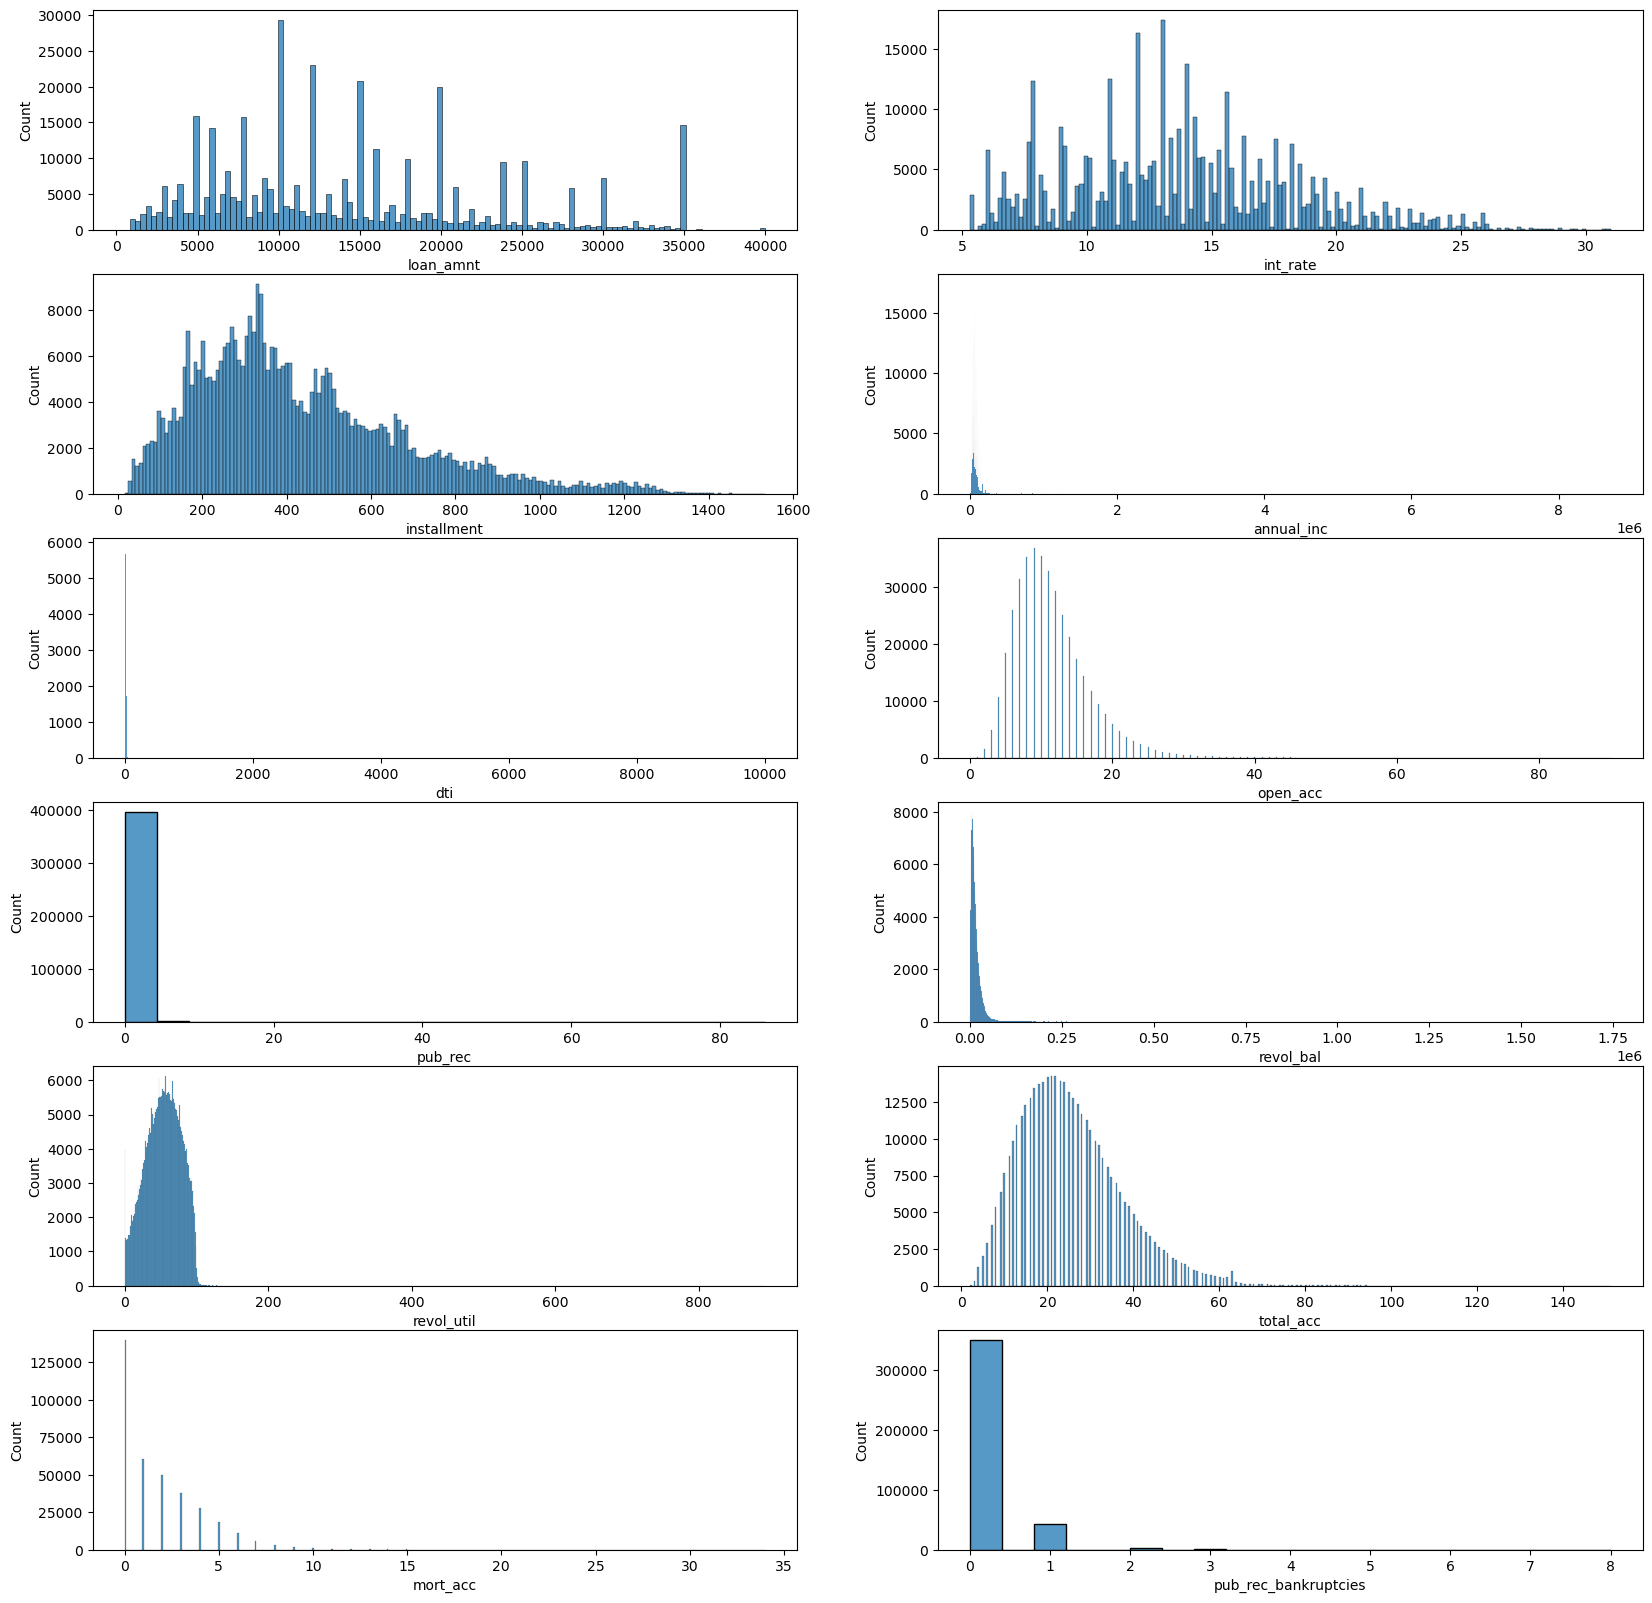

In [13]:
# Histogram plot for continuous variables to visualize their distribution
fig, axis = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
sns.histplot(x = 'loan_amnt',data = loantap,ax=axis[0,0])
sns.histplot(x = 'int_rate',data = loantap,ax=axis[0,1])
sns.histplot(x = 'installment',data = loantap,ax=axis[1,0])
sns.histplot(x = 'annual_inc',data = loantap,ax=axis[1,1])
sns.histplot(x = 'dti',data = loantap,ax=axis[2,0])
sns.histplot(x = 'open_acc',data = loantap,ax=axis[2,1])
sns.histplot(x = 'pub_rec',data = loantap,ax=axis[3,0])
sns.histplot(x = 'revol_bal',data = loantap,ax=axis[3,1])
sns.histplot(x = 'revol_util',data = loantap,ax=axis[4,0])
sns.histplot(x = 'total_acc',data = loantap,ax=axis[4,1])
sns.histplot(x = 'mort_acc',data = loantap,ax=axis[5,0])
sns.histplot(x = 'pub_rec_bankruptcies',data = loantap,ax=axis[5,1])

<AxesSubplot:xlabel='loan_status', ylabel='count'>

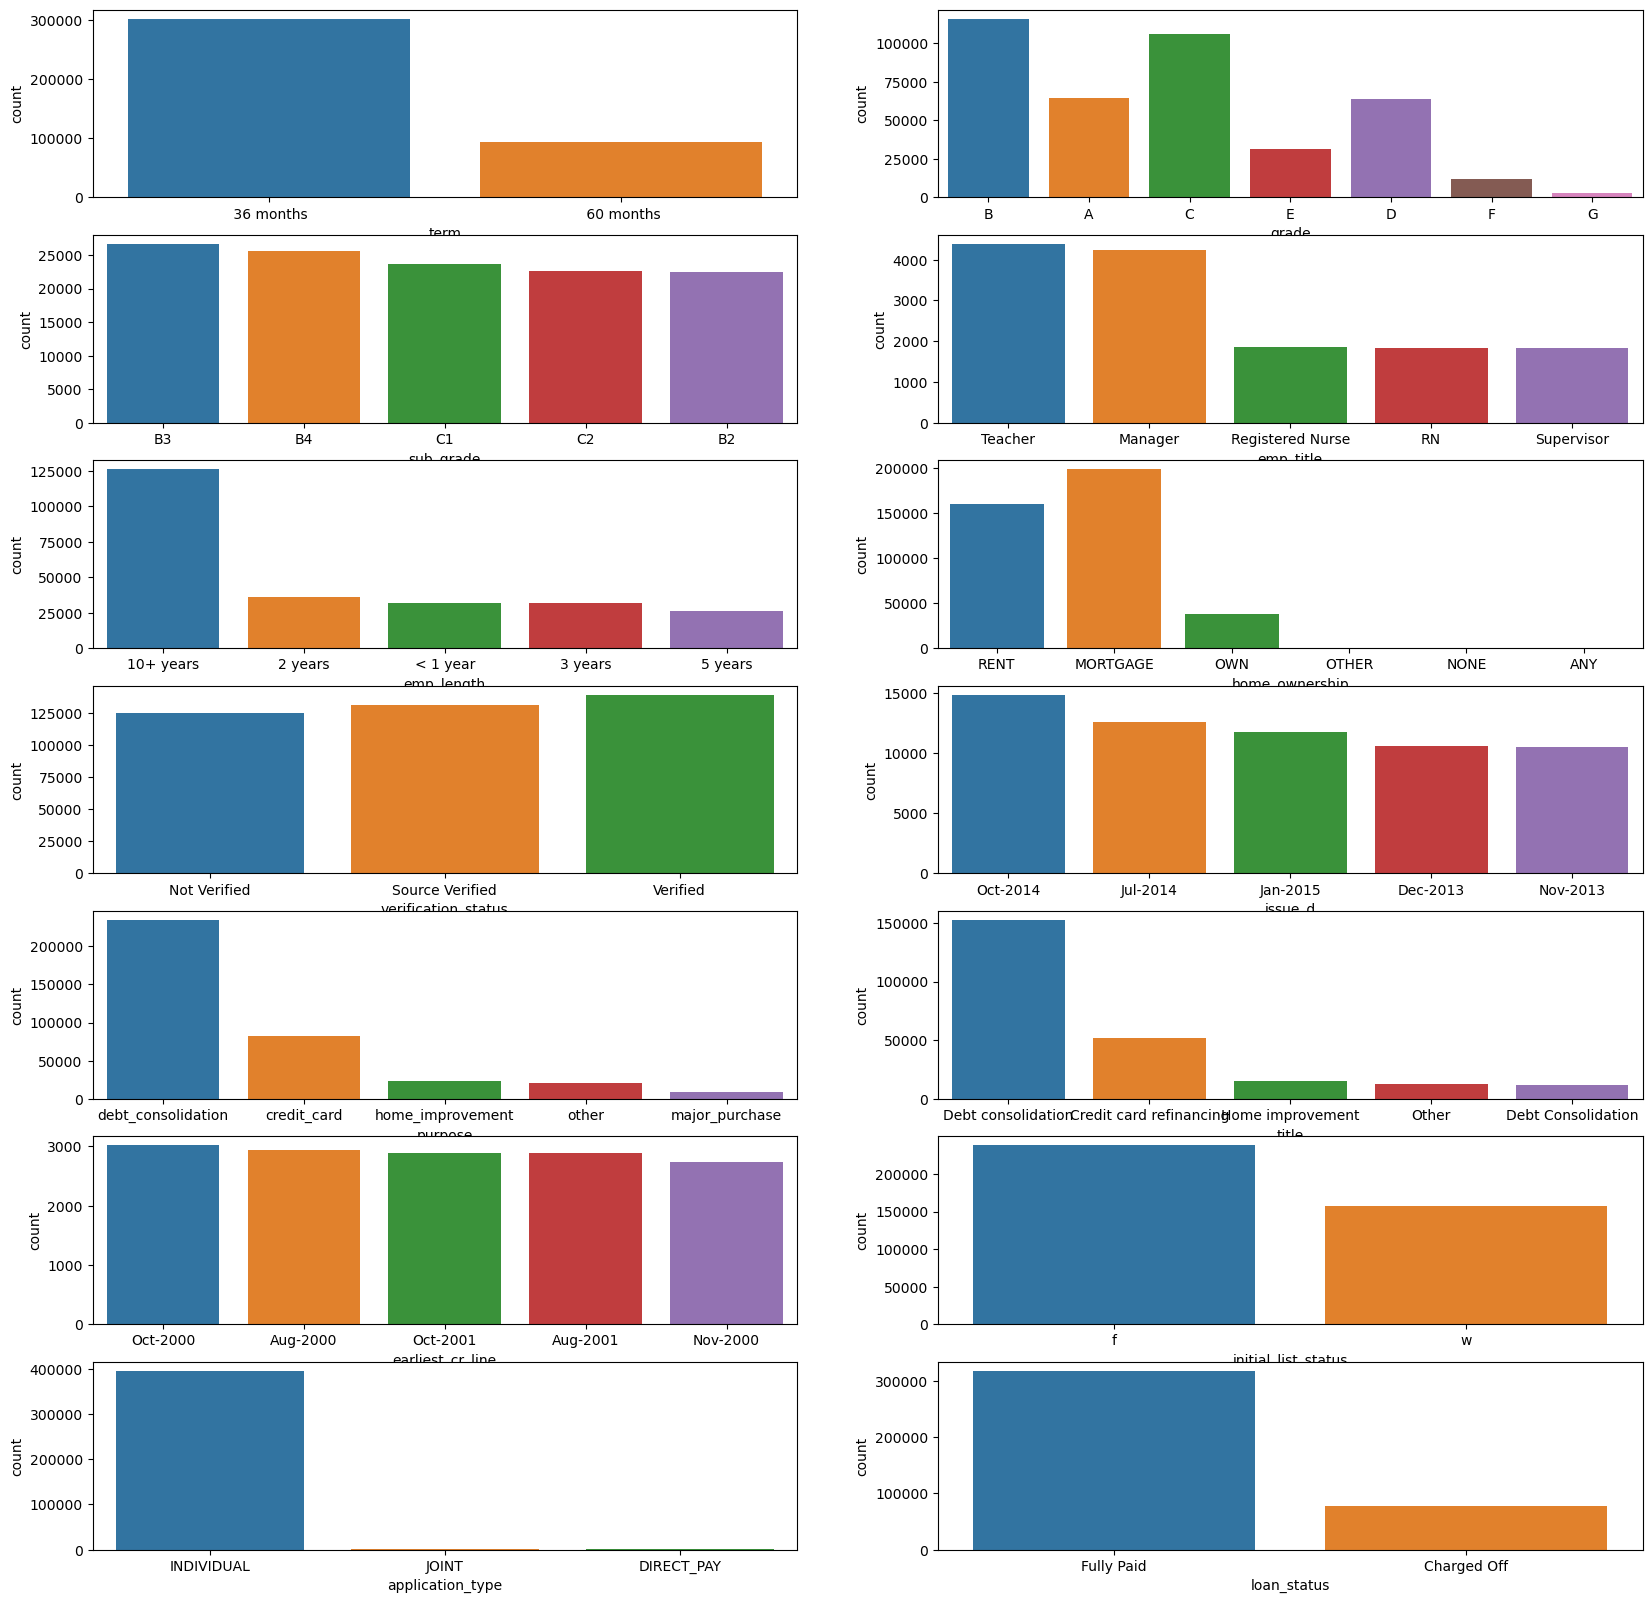

In [14]:
# countplot to demonstrate the distribution of categorical variables
fig, axis = plt.subplots(nrows=7, ncols=2, figsize=(20, 20))
sns.countplot(x = 'term',data = loantap,ax=axis[0,0])
sns.countplot(x = 'grade',data = loantap,ax=axis[0,1])
sns.countplot(x = 'sub_grade',data = loantap,ax=axis[1,0],order=loantap.value_counts(loantap['sub_grade']).iloc[:5].index)
sns.countplot(x = 'emp_title',data = loantap,ax=axis[1,1],order=loantap.value_counts(loantap['emp_title']).iloc[:5].index)
sns.countplot(x = 'emp_length',data = loantap,ax=axis[2,0],order=loantap.value_counts(loantap['emp_length']).iloc[:5].index)
sns.countplot(x = 'home_ownership',data = loantap,ax=axis[2,1])
sns.countplot(x = 'verification_status',data = loantap,ax=axis[3,0])
sns.countplot(x = 'issue_d',data = loantap,ax=axis[3,1],order=loantap.value_counts(loantap['issue_d']).iloc[:5].index)
sns.countplot(x = 'purpose',data = loantap,ax=axis[4,0],order=loantap.value_counts(loantap['purpose']).iloc[:5].index)
sns.countplot(x = 'title',data = loantap,ax=axis[4,1],order=loantap.value_counts(loantap['title']).iloc[:5].index)
sns.countplot(x = 'earliest_cr_line',data = loantap,ax=axis[5,0],order=loantap.value_counts(loantap['earliest_cr_line']).iloc[:5].index)
sns.countplot(x = 'initial_list_status',data = loantap,ax=axis[5,1],order=loantap.value_counts(loantap['initial_list_status']).iloc[:5].index)
sns.countplot(x = 'application_type',data = loantap,ax=axis[6,0])
sns.countplot(x = 'loan_status',data = loantap,ax=axis[6,1])

# Bivariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

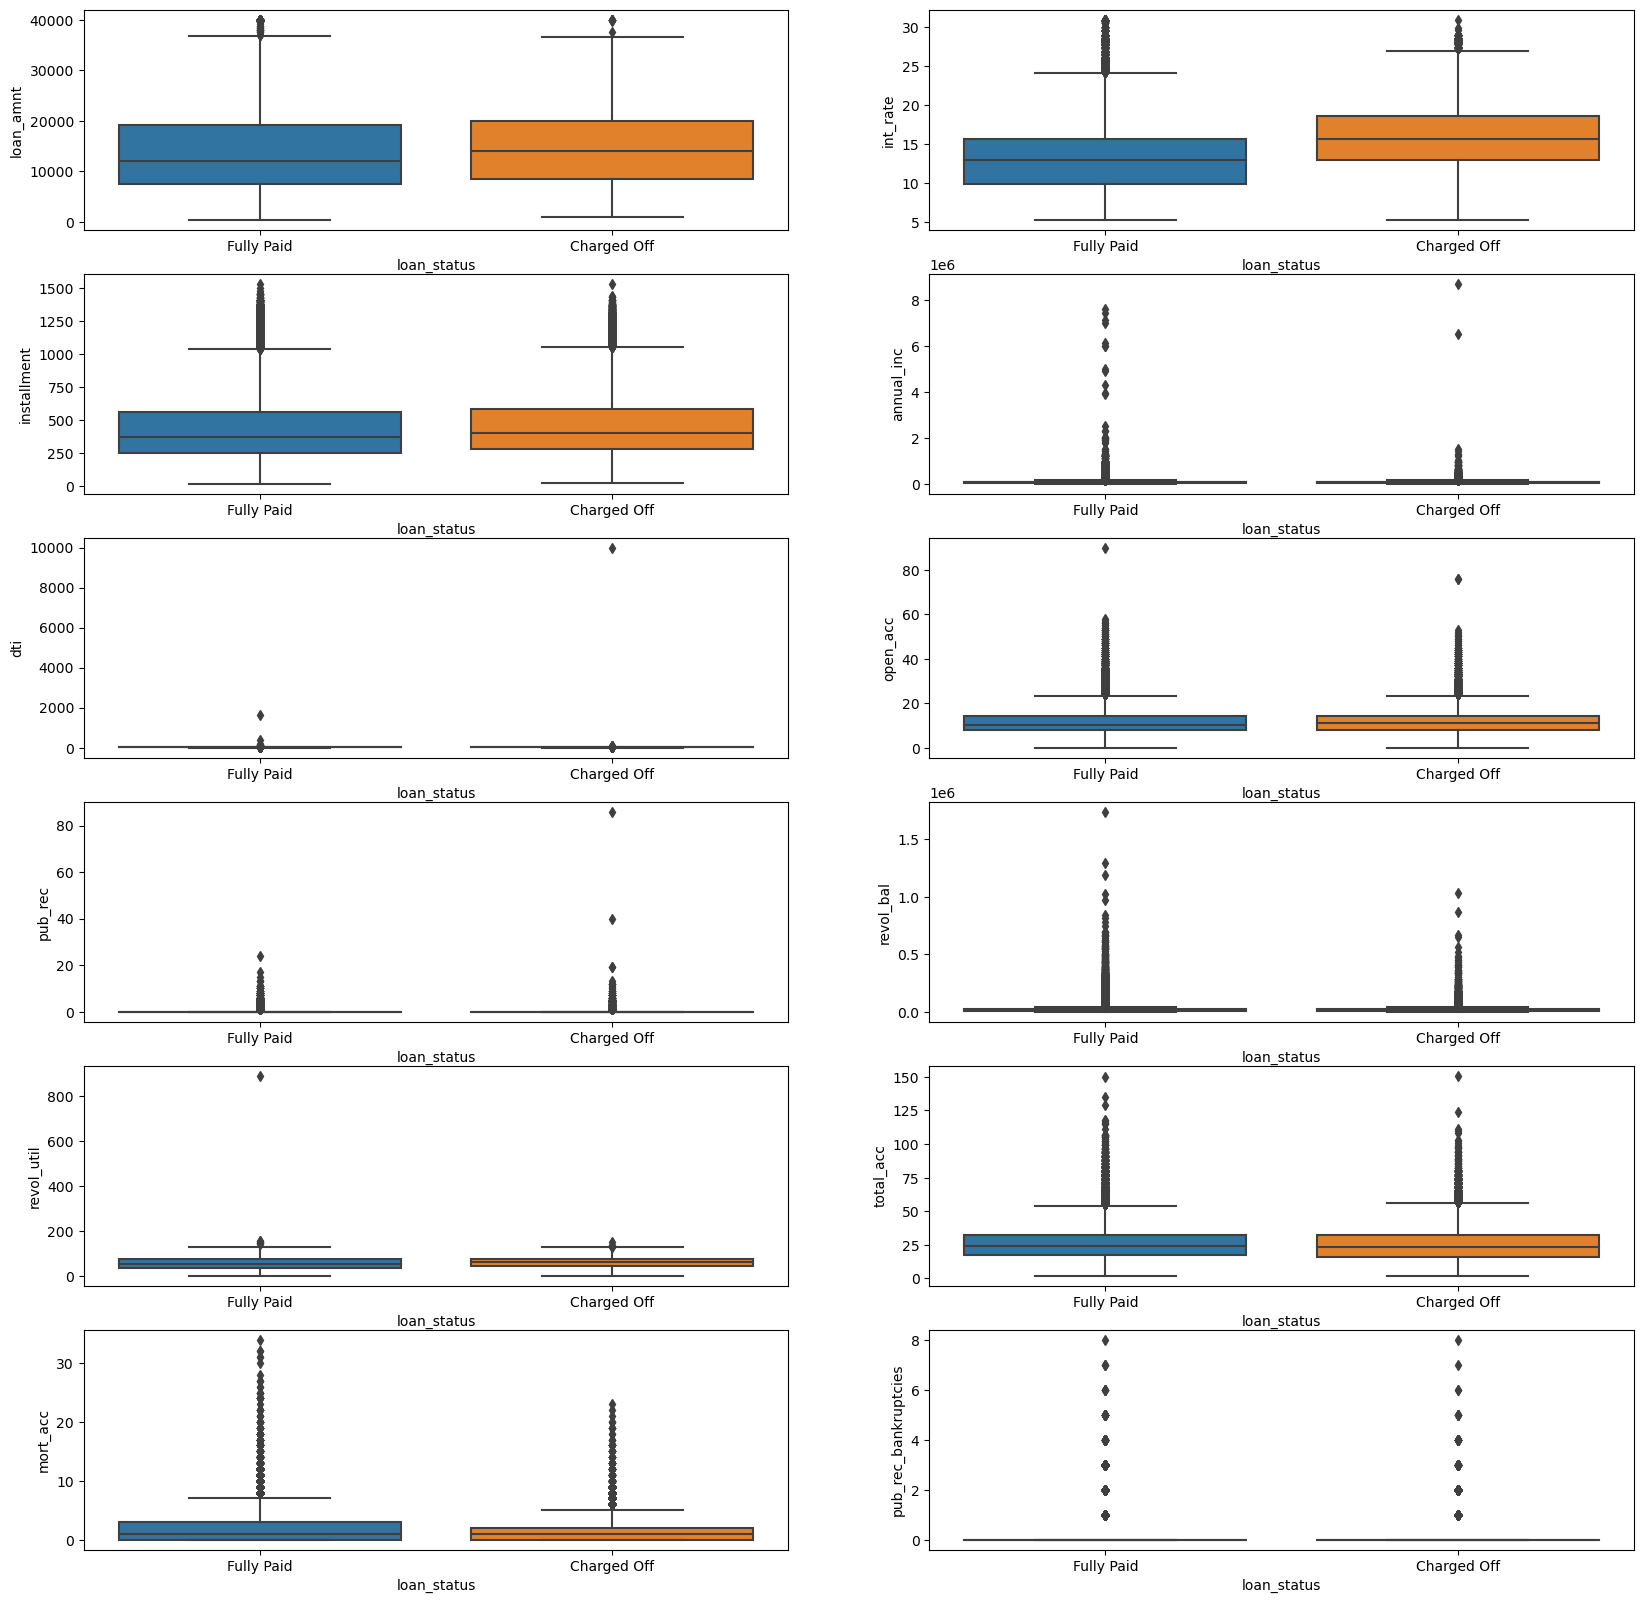

In [15]:
fig, axis = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
sns.boxplot(y = 'loan_amnt',x='loan_status',data = loantap,ax=axis[0,0])
sns.boxplot(y = 'int_rate',x='loan_status',data = loantap,ax=axis[0,1])
sns.boxplot(y = 'installment',x='loan_status',data = loantap,ax=axis[1,0])
sns.boxplot(y = 'annual_inc',x='loan_status',data = loantap,ax=axis[1,1])
sns.boxplot(y = 'dti',x='loan_status',data = loantap,ax=axis[2,0])
sns.boxplot(y = 'open_acc',x='loan_status',data = loantap,ax=axis[2,1])
sns.boxplot(y = 'pub_rec',x='loan_status',data = loantap,ax=axis[3,0])
sns.boxplot(y = 'revol_bal',x='loan_status',data = loantap,ax=axis[3,1])
sns.boxplot(y = 'revol_util',x='loan_status',data = loantap,ax=axis[4,0])
sns.boxplot(y = 'total_acc',x='loan_status',data = loantap,ax=axis[4,1])
sns.boxplot(y = 'mort_acc',x='loan_status',data = loantap,ax=axis[5,0])
sns.boxplot(y = 'pub_rec_bankruptcies',x='loan_status',data = loantap,ax=axis[5,1])

<AxesSubplot:xlabel='application_type', ylabel='count'>

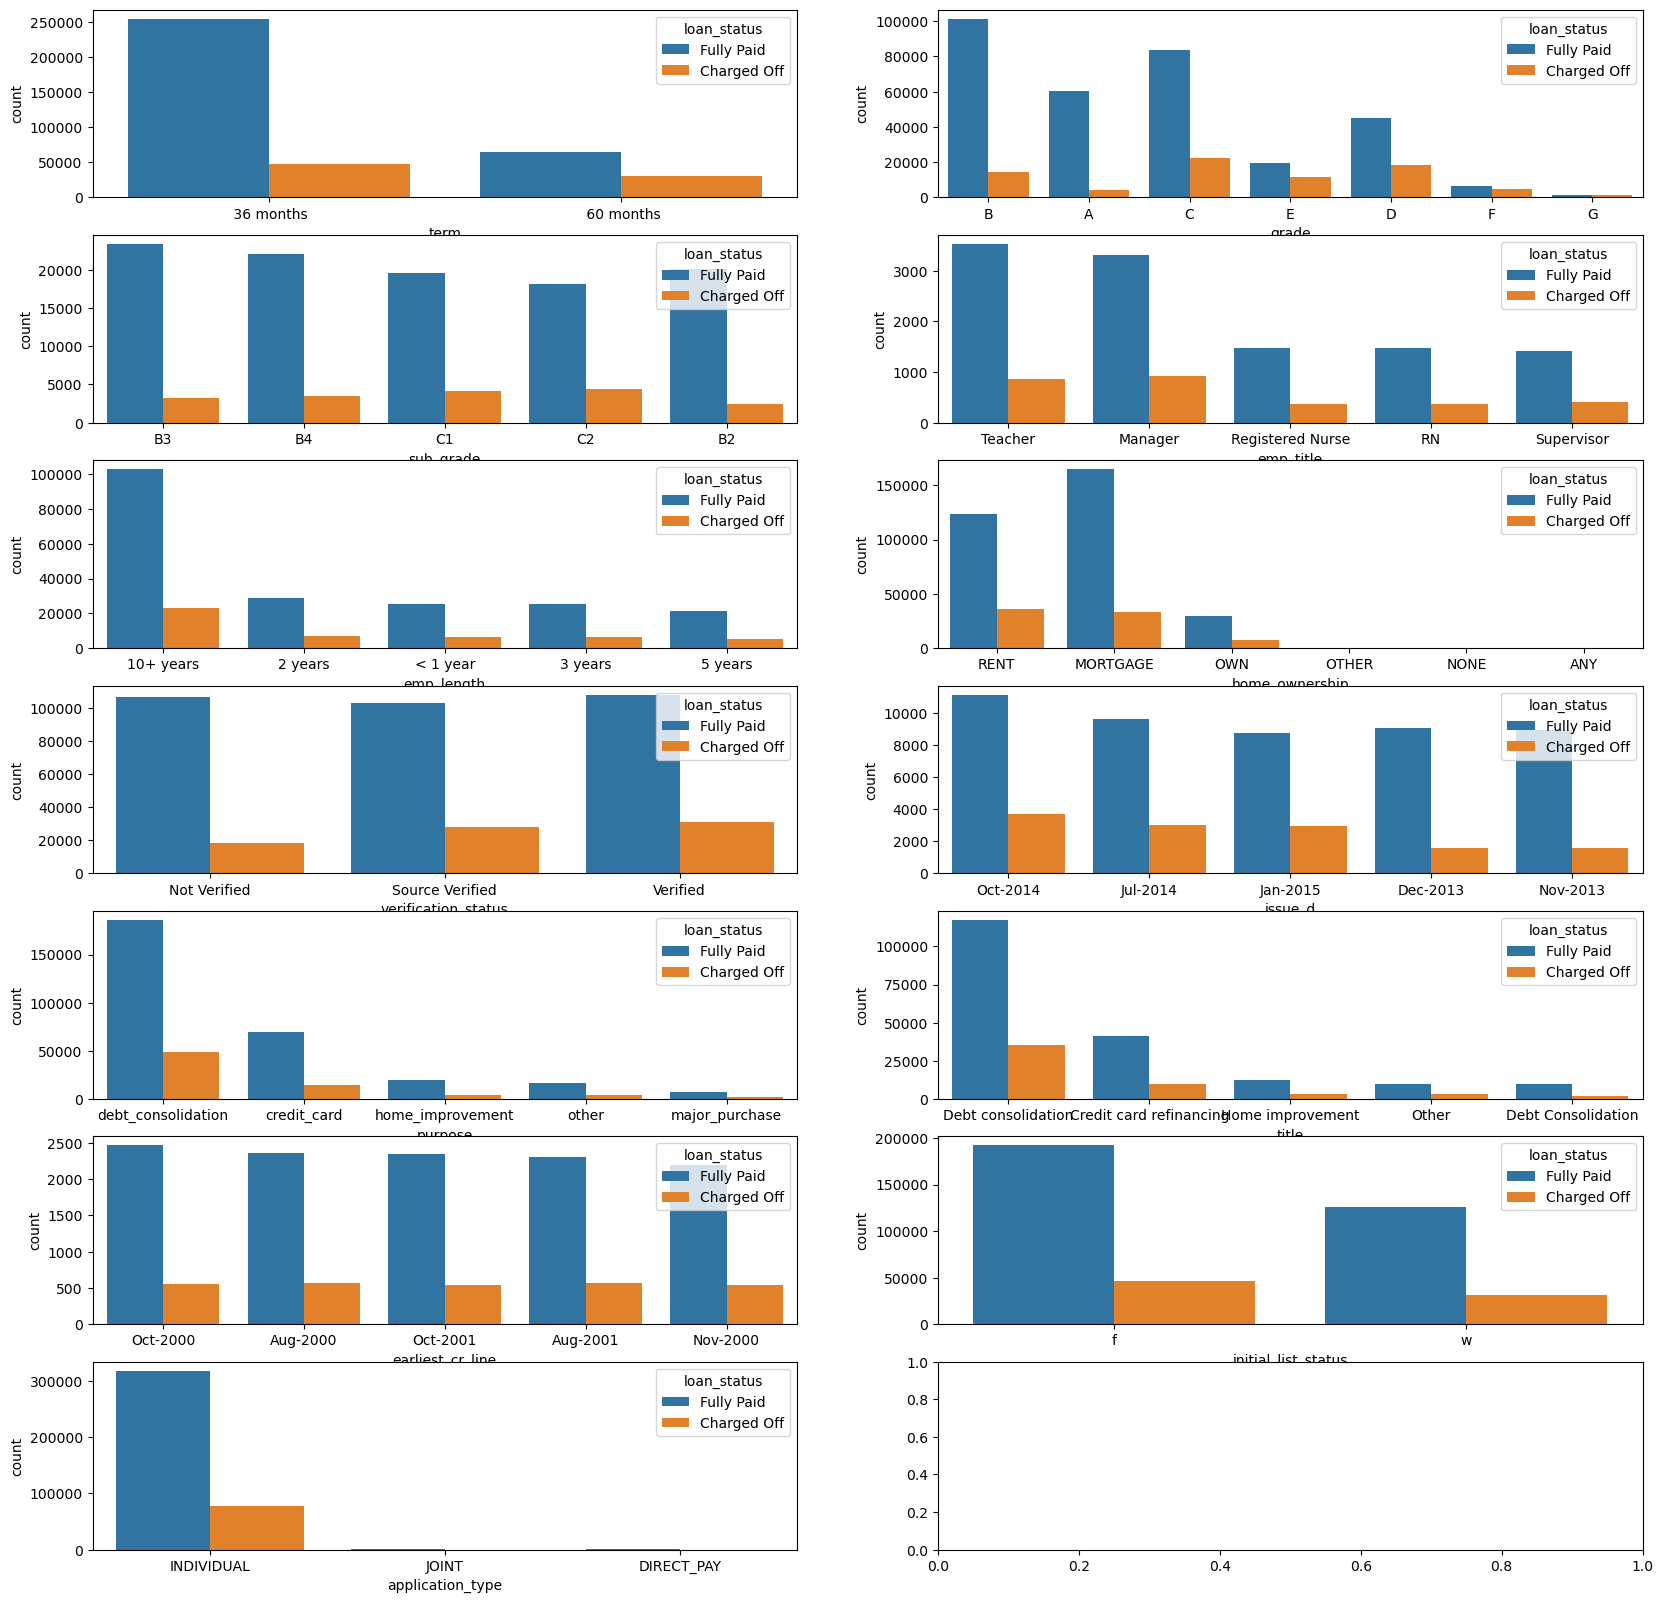

In [16]:
# barplot to demonstrate the distribution of categorical variables
fig, axis = plt.subplots(nrows=7, ncols=2, figsize=(20, 20))
sns.countplot(x = 'term',hue='loan_status',data = loantap,ax=axis[0,0])
sns.countplot(x = 'grade',hue='loan_status',data = loantap,ax=axis[0,1])
sns.countplot(x = 'sub_grade',hue='loan_status',data = loantap,ax=axis[1,0],order=loantap.value_counts(loantap['sub_grade']).iloc[:5].index)
sns.countplot(x = 'emp_title',hue='loan_status',data = loantap,ax=axis[1,1],order=loantap.value_counts(loantap['emp_title']).iloc[:5].index)
sns.countplot(x = 'emp_length',hue='loan_status',data = loantap,ax=axis[2,0],order=loantap.value_counts(loantap['emp_length']).iloc[:5].index)
sns.countplot(x = 'home_ownership',hue='loan_status',data = loantap,ax=axis[2,1])
sns.countplot(x = 'verification_status',hue='loan_status',data = loantap,ax=axis[3,0])
sns.countplot(x = 'issue_d',hue='loan_status',data = loantap,ax=axis[3,1],order=loantap.value_counts(loantap['issue_d']).iloc[:5].index)
sns.countplot(x = 'purpose',hue='loan_status',data = loantap,ax=axis[4,0],order=loantap.value_counts(loantap['purpose']).iloc[:5].index)
sns.countplot(x = 'title',hue='loan_status',data = loantap,ax=axis[4,1],order=loantap.value_counts(loantap['title']).iloc[:5].index)
sns.countplot(x = 'earliest_cr_line',hue='loan_status',data = loantap,ax=axis[5,0],order=loantap.value_counts(loantap['earliest_cr_line']).iloc[:5].index)
sns.countplot(x = 'initial_list_status',hue='loan_status',data = loantap,ax=axis[5,1],order=loantap.value_counts(loantap['initial_list_status']).iloc[:5].index)
sns.countplot(x = 'application_type',hue='loan_status',data = loantap,ax=axis[6,0])

# Duplicate value check

In [17]:
loantap.duplicated().any()

False

# Missing value treatment

In [18]:
loantap['emp_title'] = loantap['emp_title'].fillna('Other')
loantap['emp_length'] = loantap['emp_length'].fillna('Other')
loantap['title'] = loantap['title'].fillna('Other')

In [19]:
mort_acc_pd = pd.DataFrame(loantap['mort_acc'])
mort_acc_np = SimpleImputer(strategy="median").fit_transform(mort_acc_pd)
mort_acc_np = mort_acc_np.reshape(len(loantap['mort_acc']))
loantap['mort_acc'] = pd.Series(mort_acc_np)

In [20]:
pub_rec_bankruptcies_pd = pd.DataFrame(loantap['pub_rec_bankruptcies'])
pub_rec_bankruptcies_np = SimpleImputer(strategy="median").fit_transform(pub_rec_bankruptcies_pd)
pub_rec_bankruptcies_np = pub_rec_bankruptcies_np.reshape(len(loantap['pub_rec_bankruptcies']))
loantap['pub_rec_bankruptcies'] = pd.Series(pub_rec_bankruptcies_np)

In [21]:
revol_util_pd = pd.DataFrame(loantap['revol_util'])
revol_util_np = SimpleImputer(strategy="median").fit_transform(revol_util_pd)
revol_util_np = revol_util_np.reshape(len(loantap['revol_util']))
loantap['revol_util'] = pd.Series(revol_util_np)

# Feature engineering

In [22]:
loantap['pub_rec'] = loantap['pub_rec'].apply(lambda x : 0 if x <= 1.0 else 1)

In [23]:
loantap['mort_acc'] = loantap['mort_acc'].apply(lambda x : 0 if x <= 1.0 else 1)

In [24]:
loantap['pub_rec_bankruptcies'] = loantap['pub_rec_bankruptcies'].apply(lambda x : 0 if x <= 1.0 else 1)

In [25]:
#First let us encode the target variable to 0 and 1 where 0 represents the non-defaulters and 1 represents the defaulters
loantap['loan_status'] = loantap['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)

In [26]:
te = TargetEncoder()
loantap['term'] = te.fit_transform(loantap['term'], loantap['loan_status'])
loantap['term'].value_counts()

0.157746    302005
0.319415     94025
Name: term, dtype: int64

In [27]:
te = TargetEncoder()
loantap['grade'] = te.fit_transform(loantap['grade'], loantap['loan_status'])
loantap['grade'].value_counts()

0.125730    116018
0.211809    105987
0.062879     64187
0.288678     63524
0.373634     31488
0.427880     11772
0.478389      3054
Name: grade, dtype: int64

In [28]:
te = TargetEncoder()
loantap['sub_grade'] = te.fit_transform(loantap['sub_grade'], loantap['loan_status'])
loantap['sub_grade'].value_counts()

0.123354    26655
0.138393    25601
0.173696    23662
0.197520    22580
0.108513    22495
0.155037    22085
0.218416    21221
0.235355    20280
0.098582    19182
0.084908    18526
0.245067    18244
0.263803    15993
0.070239    15789
0.280338    13951
0.284218    12223
0.311315    11657
0.058056    10576
0.028677     9729
0.320103     9700
0.048186     9567
0.344070     7917
0.367380     7431
0.380377     6207
0.393024     5361
0.403106     4572
0.387443     3536
0.424801     2766
0.436133     2286
0.456072     1787
0.486757     1397
0.461248     1058
0.482759      754
0.510870      552
0.449198      374
0.503165      316
Name: sub_grade, dtype: int64

In [29]:
te = TargetEncoder()
loantap['emp_title'] = te.fit_transform(loantap['emp_title'], loantap['loan_status'])
loantap['emp_title'].value_counts()

0.170611    118155
0.300719     27091
0.259203     22928
0.168308     19454
0.165834      8001
             ...  
0.358535        10
0.341390         9
0.313641         9
0.337695         7
0.355148         6
Name: emp_title, Length: 937, dtype: int64

In [30]:
te = TargetEncoder()
loantap['emp_length'] = te.fit_transform(loantap['emp_length'], loantap['loan_status'])
loantap['emp_length'].value_counts()

0.184186    126041
0.193262     35827
0.206872     31725
0.195231     31665
0.192187     26495
0.199135     25882
0.192385     23952
0.189194     20841
0.194774     20819
0.199760     19168
0.275286     18301
0.200470     15314
Name: emp_length, dtype: int64

In [31]:
te = TargetEncoder()
loantap['home_ownership'] = te.fit_transform(loantap['home_ownership'], loantap['loan_status'])
loantap['home_ownership'].value_counts()

0.169561    198348
0.226622    159790
0.206803     37746
0.142863       112
0.218395        31
0.165834         3
Name: home_ownership, dtype: int64

In [32]:
te = TargetEncoder()
loantap['verification_status'] = te.fit_transform(loantap['verification_status'], loantap['loan_status'])
loantap['verification_status'].value_counts()

0.223211    139563
0.214743    131385
0.146360    125082
Name: verification_status, dtype: int64

In [33]:
te = TargetEncoder()
loantap['issue_d'] = te.fit_transform(loantap['issue_d'], loantap['loan_status'])
loantap['issue_d'].value_counts()

0.251111    14846
0.239908    12609
0.252029    11705
0.150876    10618
0.151772    10496
            ...  
0.069497       26
0.198539       25
0.138276       22
0.197591       15
0.170611        1
Name: issue_d, Length: 114, dtype: int64

In [34]:
te = TargetEncoder()
loantap['purpose'] = te.fit_transform(loantap['purpose'], loantap['loan_status'])
loantap['purpose'].value_counts()

0.207414    234507
0.167118     83019
0.170079     24030
0.212178     21185
0.164733      8790
0.294510      5701
0.134767      4697
0.217112      4196
0.234758      2854
0.189233      2452
0.197183      2201
0.120861      1812
0.234043       329
0.163424       257
Name: purpose, dtype: int64

In [35]:
te = TargetEncoder()
loantap['title'] = te.fit_transform(loantap['title'], loantap['loan_status'])
loantap['title'].value_counts()

0.230127    152472
0.192806     51487
0.170611     35511
0.189924     15264
0.228805     14685
             ...  
0.306291        10
0.277853        10
0.285892         9
0.322178         6
0.331165         4
Name: title, Length: 511, dtype: int64

In [36]:
te = TargetEncoder()
loantap['earliest_cr_line'] = te.fit_transform(loantap['earliest_cr_line'], loantap['loan_status'])
loantap['earliest_cr_line'].value_counts()

0.182632    3017
0.193867    2935
0.187500    2896
0.198682    2884
0.196272    2736
            ... 
0.150730       8
0.268811       6
0.196835       5
0.217322       3
0.310159       2
Name: earliest_cr_line, Length: 577, dtype: int64

In [37]:
te = TargetEncoder()
loantap['initial_list_status'] = te.fit_transform(loantap['initial_list_status'], loantap['loan_status'])
loantap['initial_list_status'].value_counts()

0.193060    238066
0.200755    157964
Name: initial_list_status, dtype: int64

In [38]:
te = TargetEncoder()
loantap['application_type'] = te.fit_transform(loantap['application_type'], loantap['loan_status'])
loantap['application_type'].value_counts()

0.196087    395319
0.127059       425
0.356643       286
Name: application_type, dtype: int64

In [39]:
loantap['address'] = loantap.loc[:,'address'].apply(lambda x : x[-7:-9:-1])

In [40]:
loantap['address'] = loantap.address.apply(lambda x : x[::-1])

In [41]:
te = TargetEncoder()
loantap['address'] = te.fit_transform(loantap['address'], loantap['loan_status'])
loantap['address'].value_counts()

0.200797    14308
0.195168    14157
0.194770    13919
0.194190     7091
0.197995     7081
0.193690     7068
0.202472     7038
0.197612     7034
0.196098     7022
0.195101     7022
0.190578     7005
0.186465     7004
0.201913     7003
0.195714     7000
0.196472     6973
0.194349     6972
0.198163     6969
0.193141     6969
0.199512     6967
0.199626     6958
0.191147     6958
0.199568     6945
0.204061     6944
0.194669     6940
0.197579     6939
0.198587     6934
0.208135     6933
0.199365     6927
0.191858     6927
0.194773     6926
0.193469     6921
0.196589     6918
0.194677     6914
0.192013     6911
0.194235     6904
0.180910     6904
0.198522     6901
0.189620     6898
0.190490     6898
0.195419     6898
0.196346     6896
0.202175     6895
0.196602     6887
0.197038     6887
0.201947     6883
0.192028     6874
0.196681     6869
0.193934     6858
0.194339     6854
0.195557     6842
0.195118     6842
0.202784     6825
0.193458     6818
0.200882     6800
Name: address, dtype: int64

# Outlier treatment

In [42]:
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))
    return df

In [43]:
loantap['loan_amnt'] = impute_outliers_IQR(loantap['loan_amnt'])

In [44]:
loantap['int_rate'] = impute_outliers_IQR(loantap['int_rate'])

In [45]:
loantap['installment'] = impute_outliers_IQR(loantap['installment'])

In [46]:
loantap['annual_inc'] = impute_outliers_IQR(loantap['annual_inc'])

In [47]:
loantap['dti'] = impute_outliers_IQR(loantap['dti'])

In [48]:
loantap['open_acc'] = impute_outliers_IQR(loantap['open_acc'])

In [49]:
loantap['revol_bal'] = impute_outliers_IQR(loantap['revol_bal'])

In [50]:
loantap['revol_util'] = impute_outliers_IQR(loantap['revol_util'])

In [51]:
loantap['total_acc'] = impute_outliers_IQR(loantap['total_acc'])

<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

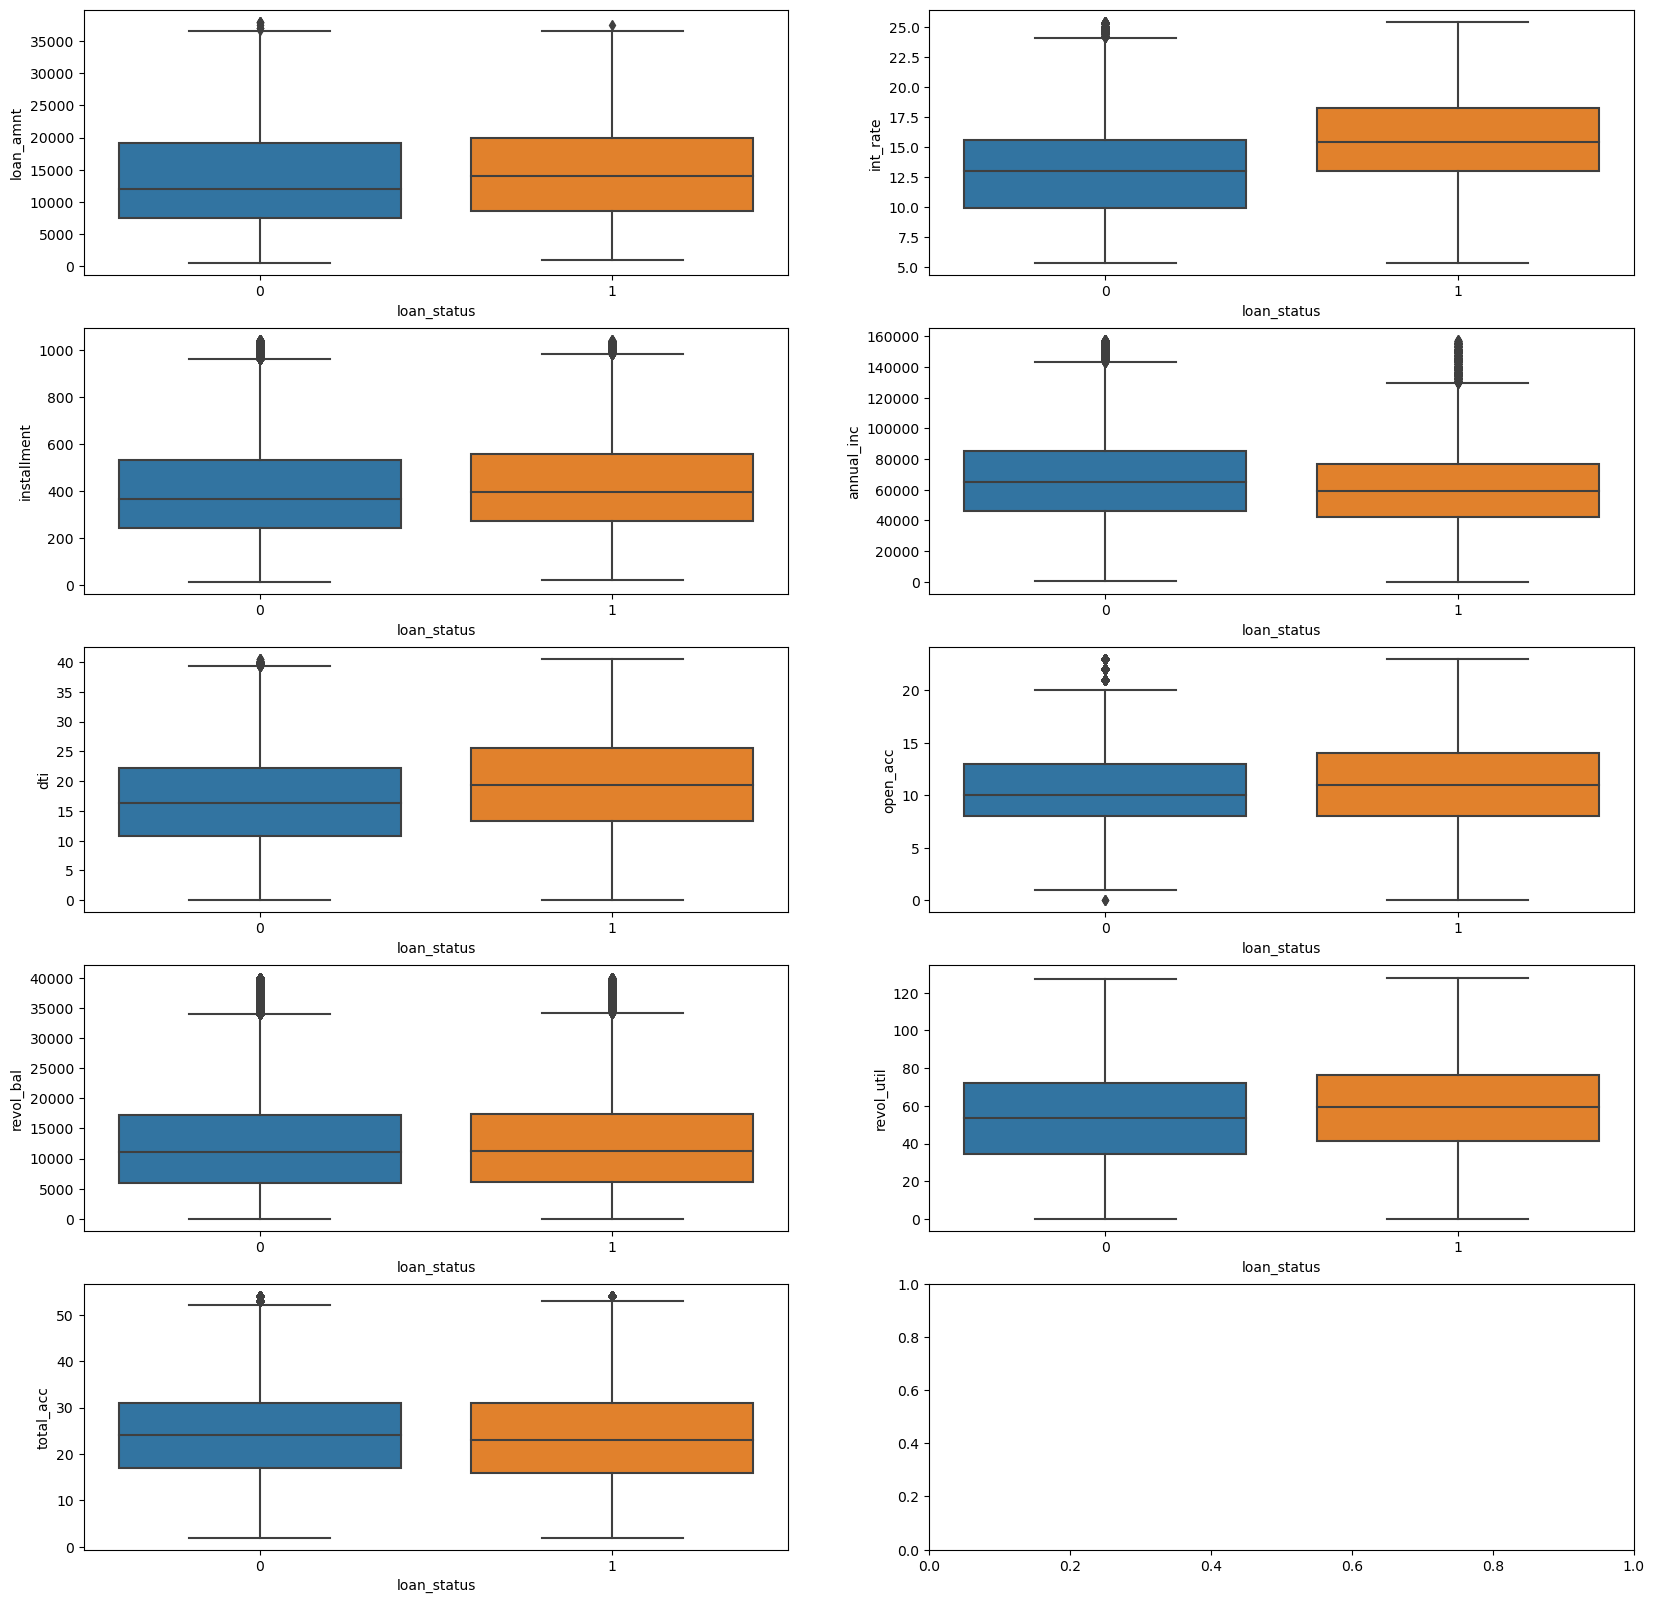

In [52]:
fig, axis = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
sns.boxplot(y = 'loan_amnt',x='loan_status',data = loantap,ax=axis[0,0])
sns.boxplot(y = 'int_rate',x='loan_status',data = loantap,ax=axis[0,1])
sns.boxplot(y = 'installment',x='loan_status',data = loantap,ax=axis[1,0])
sns.boxplot(y = 'annual_inc',x='loan_status',data = loantap,ax=axis[1,1])
sns.boxplot(y = 'dti',x='loan_status',data = loantap,ax=axis[2,0])
sns.boxplot(y = 'open_acc',x='loan_status',data = loantap,ax=axis[2,1])
sns.boxplot(y = 'revol_bal',x='loan_status',data = loantap,ax=axis[3,0])
sns.boxplot(y = 'revol_util',x='loan_status',data = loantap,ax=axis[3,1])
sns.boxplot(y = 'total_acc',x='loan_status',data = loantap,ax=axis[4,0])

# Correlation among independent variables

In [53]:
x_corr = loantap.drop('loan_status',axis=1)

In [54]:
x_corr.corr()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
loan_amnt,1.000000,0.394208,0.155822,0.875468,0.176745,0.182720,-0.054524,-0.101064,-0.187669,0.457890,...,0.195575,-0.027805,0.431213,0.101382,0.223714,0.076710,-0.013536,0.220062,-0.027889,-0.000343
term,0.394208,1.000000,0.412051,0.226011,0.458423,0.468917,0.058509,-0.061540,-0.099181,0.119779,...,0.076270,-0.010064,0.136769,0.055260,0.099923,0.104799,-0.005181,0.084837,-0.004505,-0.001159
int_rate,0.155822,0.412051,1.000000,0.135061,0.915261,0.934355,0.144285,0.002172,0.079531,-0.085192,...,-0.001149,0.034036,0.016341,0.301791,-0.047832,-0.062072,0.022395,-0.055966,0.019231,0.000782
installment,0.875468,0.226011,0.135061,1.000000,0.144061,0.149103,-0.050495,-0.090912,-0.154245,0.406502,...,0.183585,-0.024770,0.405233,0.121731,0.194516,0.049349,-0.007036,0.186122,-0.025460,-0.000024
grade,0.176745,0.458423,0.915261,0.144061,1.000000,0.977576,0.159322,0.004500,0.071696,-0.065790,...,0.005397,0.042531,0.004498,0.255652,-0.037057,-0.016214,0.026623,-0.054410,0.026932,0.002605
sub_grade,0.182720,0.468917,0.934355,0.149103,0.977576,1.000000,0.163577,0.004218,0.074464,-0.067266,...,0.005403,0.044089,0.006697,0.265678,-0.037887,-0.011655,0.027127,-0.056921,0.027450,0.002803
emp_title,-0.054524,0.058509,0.144285,-0.050495,0.159322,0.163577,1.000000,0.208816,0.051859,-0.187339,...,-0.038851,0.031875,-0.078047,0.002891,-0.062556,0.041745,0.005371,-0.040468,0.018680,0.003522
emp_length,-0.101064,-0.061540,0.002172,-0.090912,0.004500,0.004218,0.208816,1.000000,0.060652,-0.176131,...,-0.062735,0.016666,-0.073329,-0.036094,-0.058613,-0.002670,0.000484,-0.041117,0.006170,0.000977
home_ownership,-0.187669,-0.099181,0.079531,-0.154245,0.071696,0.074464,0.051859,0.060652,1.000000,-0.251064,...,-0.142499,0.006662,-0.180997,-0.006517,-0.230429,-0.038741,0.012226,-0.470529,0.012283,0.002232
annual_inc,0.457890,0.119779,-0.085192,0.406502,-0.065790,-0.067266,-0.187339,-0.176131,-0.251064,1.000000,...,0.205134,0.006628,0.329186,0.053457,0.289018,0.064823,-0.006312,0.292662,-0.010543,-0.001550


In [55]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
vif = pd.DataFrame()
X_t = x_corr
vif['Features'] = x_corr.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,initial_list_status,1770.52
25,address,1419.15
22,application_type,1241.99
5,sub_grade,135.87
7,emp_length,118.89
4,grade,105.51
2,int_rate,95.58
12,purpose,87.98
15,earliest_cr_line,71.30
8,home_ownership,70.47


In [57]:
loantap = loantap.drop('loan_amnt',axis=1)

# Model building

In [58]:
X = loantap[['term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','purpose','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type','mort_acc','pub_rec_bankruptcies']]

In [59]:
Y = loantap['loan_status']
Y = np.array(Y).reshape(len(Y), 1) #Reshaping our data to (m,1) shape

In [60]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(237618, 22)

# Scaling

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\pgpra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

to check the model statistics, lets check the accuracy of the model 

In [63]:
def accuracy(y_true, y_pred):
    y_true = y_true.reshape(len(y_true))
    return np.sum(y_true==y_pred)/y_true.shape[0]

In [64]:
accuracy(y_train, model.predict(X_train))

0.8613025949212602

In [65]:
accuracy(y_val, model.predict(X_val))

0.8599474787263591

In [66]:
model.coef_

array([[ 0.25322404,  0.0430141 ,  0.09131144, -0.01718616,  0.36504629,
         1.37371862, -0.0717529 ,  0.14967066,  0.00885806,  0.04342808,
         0.03299318,  0.17609674,  0.05654226,  0.13554854,  0.00387704,
        -0.04583778,  0.17081967, -0.02724519, -0.06811192,  0.00876559,
        -0.06751987, -0.00288978]])

In [67]:
model.intercept_

array([-2.03989227])

# Display model coefficients with column names

In [68]:
columns = X.columns
coefficients = model.coef_
columns = pd.Series(columns)
coefficients = model.coef_
coefficients = coefficients.reshape(len(X.columns),1)
list_of_tuples = list(zip(columns, coefficients))
pd.DataFrame(list_of_tuples,columns = ['Features','Coefficients'])

,Features,Coefficients
0,term,[0.25322404220405137]
1,int_rate,[0.04301409769505457]
2,installment,[0.09131144078675935]
3,grade,[-0.017186159315914218]
4,sub_grade,[0.365046294256991]
5,emp_title,[1.3737186249336601]
6,emp_length,[-0.07175290195464379]
7,home_ownership,[0.14967066013523841]
8,annual_inc,[0.00885805894826787]
9,verification_status,[0.043428082267438]


# Results Evaluation

In [69]:
from sklearn.metrics import precision_score

y_pred = model.predict(X_test)
precision_score(y_test, y_pred)

0.7109762824048539

In [70]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.494185303514377

In [71]:
from sklearn.metrics import f1_score

print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.5830820265379976


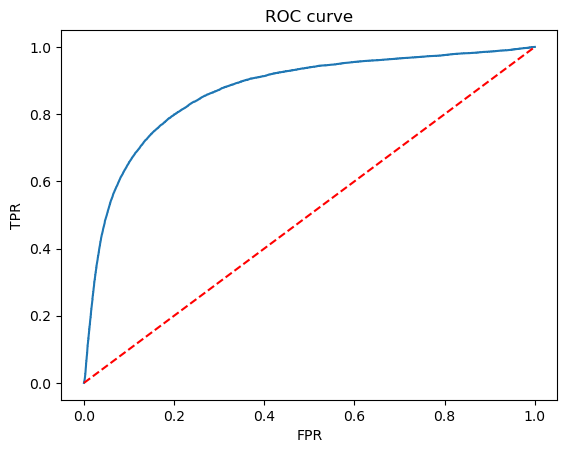

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
probability = model.predict_proba(X_test)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)

plt.plot(fpr,tpr)
#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [73]:
# AUC
roc_auc_score(y_test,probabilites)

0.8691223789560844

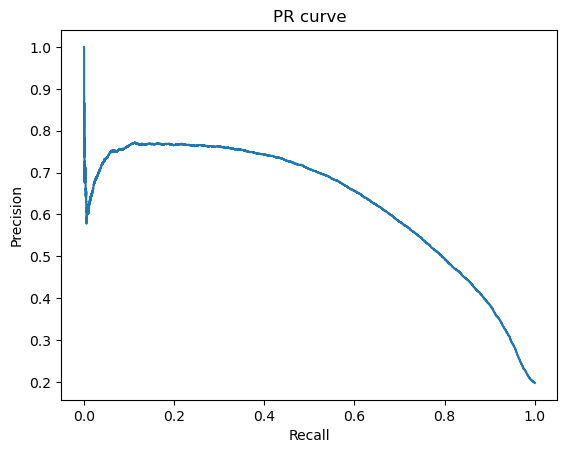

In [74]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thr = precision_recall_curve(y_test, probabilites)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [75]:
auc(recall, precision)

0.6308543002472584

# Classification Report

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[60412,  3144],
       [ 7916,  7734]], dtype=int64)

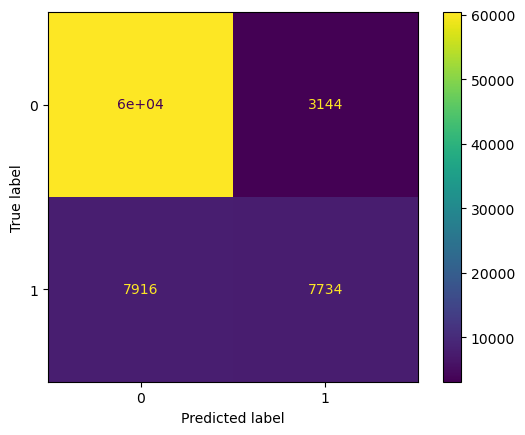

In [77]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [78]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     63556
           1       0.71      0.49      0.58     15650

    accuracy                           0.86     79206
   macro avg       0.80      0.72      0.75     79206
weighted avg       0.85      0.86      0.85     79206



# Tradeoff Questions

# How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it

In [79]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

    model.fit(X_train, y_train)

    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)

    train_score_f1 = f1_score(y_train, train_y_pred)
    test_score_f1 = f1_score(y_test, test_y_pred)

    return train_score_f1,test_score_f1

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

# Perform SMOTE on the training data
print('Before SMOTE')
y_train1 = pd.DataFrame(y_train)
print(y_train1.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
y_sm1 = pd.DataFrame(y_sm)
print(y_sm1.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before SMOTE
0    191163
1     46455
dtype: int64
After Oversampling
0    191163
1    191163
dtype: int64
Training F1 score:0.8044751476085436, Testing F1 score:0.6181735666380919


# Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

# Actionable Insights & Recommendations

In [81]:
loantap2 = pd.read_csv('C:/DSML/LoanTap/logistic_regression.csv')
loantap2['address'] = loantap2.loc[:,'address'].apply(lambda x : x[-7:-9:-1])
loantap2['address'] = loantap2.address.apply(lambda x : x[::-1])
loantap2['address'].value_counts().nlargest(5)

AP    14308
AE    14157
AA    13919
NJ     7091
WI     7081
Name: address, dtype: int64

In [82]:
loantap2['emp_title'].value_counts().nlargest(5)

Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Name: emp_title, dtype: int64

In [83]:
loantap2.groupby('loan_status')['home_ownership'].value_counts()

loan_status  home_ownership
Charged Off  RENT               36212
             MORTGAGE           33632
             OWN                 7806
             OTHER                 16
             NONE                   7
Fully Paid   MORTGAGE          164716
             RENT              123578
             OWN                29940
             OTHER                 96
             NONE                  24
             ANY                    3
Name: home_ownership, dtype: int64

In [84]:
(loantap2['loan_status'].value_counts()/len(loantap2))*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [85]:
loantap2.groupby('loan_status')['application_type'].value_counts()

loan_status  application_type
Charged Off  INDIVIDUAL           77517
             DIRECT_PAY             102
             JOINT                   54
Fully Paid   INDIVIDUAL          317802
             JOINT                  371
             DIRECT_PAY             184
Name: application_type, dtype: int64

In [86]:
(loantap2['home_ownership'].value_counts()/len(loantap2)) * 100

MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.028281
NONE         0.007828
ANY          0.000758
Name: home_ownership, dtype: float64

In [87]:
(loantap2.groupby('loan_status')['grade'].value_counts()/len(loantap2)) * 100

loan_status  grade
Charged Off  C         5.668510
             D         4.630457
             B         3.683307
             E         2.970735
             F         1.271873
             A         1.019115
             G         0.368911
Fully Paid   B        25.611949
             C        21.093857
             A        15.188496
             D        11.409742
             E         4.980178
             F         1.700629
             G         0.402242
Name: grade, dtype: float64

In [88]:
loantap3_X = loantap[['term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','purpose','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type','mort_acc','pub_rec_bankruptcies']]
loantap3_Y = loantap['loan_status']

In [89]:
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(estimator= model, step = 1, cv = 5, scoring="accuracy")
rfecv = rfecv.fit(loantap3_X, loantap3_Y)
print("The optimal number of features:", rfecv.n_features_)
print("Best features:", loantap3_X.columns[rfecv.support_])

C:\Users\pgpra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\pgpra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\pgpra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\pgpra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\pgpra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\pgpra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

The optimal number of features: 14
Best features: Index(['int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'initial_list_status',
       'application_type', 'mort_acc'],
      dtype='object')


C:\Users\pgpra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
